In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
from nltk import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [2]:
#loading dataset
data = pd.read_csv('British_Airway_Review.csv',parse_dates=['date'])
data.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,2023-08-01,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,2023-07-31,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,2023-07-31,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",2023-07-31,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,2023-07-29,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


# DATA VALIDATION AND CLEANING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   reviews            2500 non-null   object        
 1   date               2500 non-null   datetime64[ns]
 2   country            2500 non-null   object        
 3   seat_type          2500 non-null   object        
 4   recommended        2500 non-null   object        
 5   stars              2500 non-null   int64         
 6   route              2500 non-null   object        
 7   type_of_traveller  2500 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 156.4+ KB


In [4]:
#checking for number of rows and columns
data.shape

(2500, 8)

In [5]:
#dropping duplicate entries if existing
data.drop_duplicates(inplace =True)
data.shape

(2500, 8)

In [6]:
#checking for missing values
data.isna().sum()

reviews              0
date                 0
country              0
seat_type            0
recommended          0
stars                0
route                0
type_of_traveller    0
dtype: int64

In [7]:
#Date which data collection started and ended
print(min(data.date), max(data.date))

2015-11-10 00:00:00 2023-08-01 00:00:00


In [8]:
#Unique star values (It should range from 1 to 5)
sorted(data.stars.unique())

[1, 3, 5, 7, 9]

**As seen, there were 5 unique stars which were 1,3,5,7,9 as against the information on the datacard which described unique stars as a range from 1 to 5. This may be due to data entry error. Proper replacing was done to achieve the information in the data card.

In [9]:
data.stars.replace({3:2,5:3,7:4,9:5}, inplace = True)
sorted(data.stars.unique())

[1, 2, 3, 4, 5]

In [10]:
#creating Year and Month Columns
data['Year']= pd.to_datetime(data['date']).dt.year
data['Month'] = pd.to_datetime(data['date']).dt.month

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   reviews            2500 non-null   object        
 1   date               2500 non-null   datetime64[ns]
 2   country            2500 non-null   object        
 3   seat_type          2500 non-null   object        
 4   recommended        2500 non-null   object        
 5   stars              2500 non-null   int64         
 6   route              2500 non-null   object        
 7   type_of_traveller  2500 non-null   object        
 8   Year               2500 non-null   int64         
 9   Month              2500 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 214.8+ KB


**Data Exploration**

In [12]:
data.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller,Year,Month
0,✅ Trip Verified | I had the most fantastic BA...,2023-08-01,Hong Kong,Business Class,yes,3,Heathrow to Las Vegas,Family Leisure,2023,8
1,✅ Trip Verified | Couldn’t book in online. Ar...,2023-07-31,United Kingdom,Economy Class,no,2,Rome to Heathrow,Solo Leisure,2023,7
2,✅ Trip Verified | London Heathrow to Mumbai in...,2023-07-31,Iceland,Business Class,yes,2,Gatwick to Venice,Solo Leisure,2023,7
3,"✅ Trip Verified | Keflavík, Iceland to London ...",2023-07-31,Iceland,Business Class,yes,3,London to Luanda,Couple Leisure,2023,7
4,✅ Trip Verified | Terrible Experience with Bri...,2023-07-29,Canada,Economy Class,no,3,Denver to Heathrow,Family Leisure,2023,7


**STAR RATINGS**

In [13]:
average_rating = data['stars'].mean()
average_rating

2.636

*The average rating of the airline is 2.636 out of 5. This shows an average performance and the need for improvement*

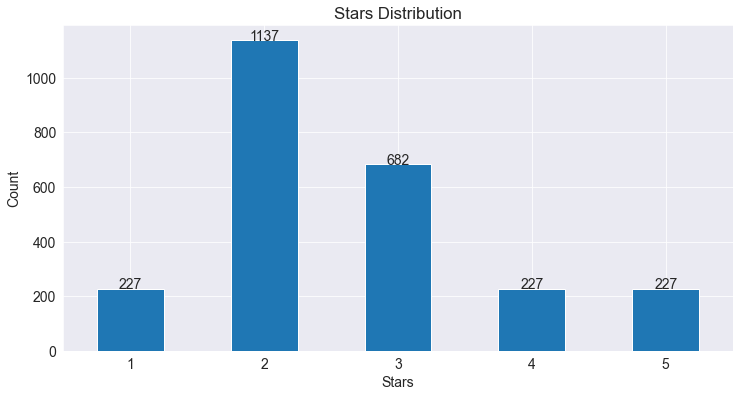

In [14]:
stars_dist = data['stars'].value_counts().sort_index()
stars_dist.plot(kind='bar')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Stars Distribution')
plt.xticks(rotation=360)
for index, value in enumerate(stars_dist):
    plt.text(index, value, str(value), ha='center')

In [38]:
data.recommended.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

no     64.8%
yes    35.2%
Name: recommended, dtype: object

*Majority of the customers gave a 2 or 3 stars for the service.*

**STARS AND RECOMMENDED RELATIONSHIP**

Text(0, 0.5, '')

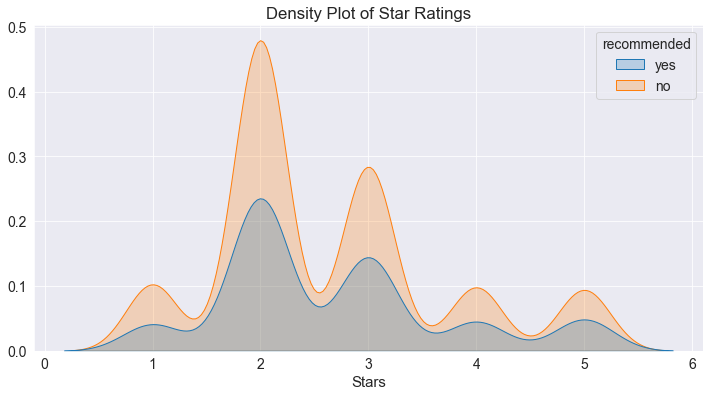

In [39]:
sns.kdeplot(data=data, x='stars',fill=True, hue='recommended')
plt.title('Density Plot of Star Ratings')
plt.xlabel('Stars', fontsize=15)
plt.ylabel('')

*As seen from the density plot, majority of the customers gave 2-star and they tended not to recommend the flight*

**TYPE OF TRAVELLER**

In [16]:
data.type_of_traveller.unique()

array(['Family Leisure', 'Solo Leisure', 'Couple Leisure', 'Business'],
      dtype=object)

In [17]:
Travellertype = data['type_of_traveller'].value_counts()
Travellertype

Couple Leisure    1000
Family Leisure     500
Solo Leisure       500
Business           500
Name: type_of_traveller, dtype: int64

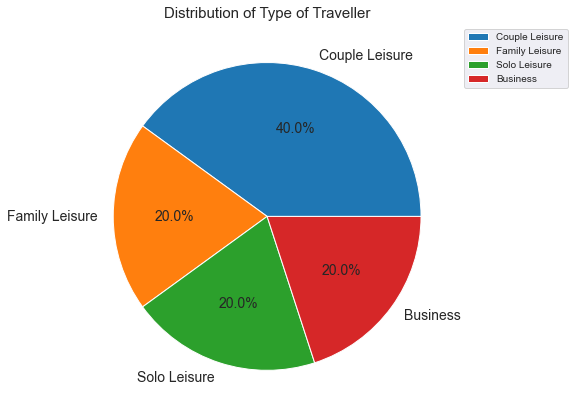

In [18]:
# Distribution plot for Type of Travellers
plt.title('Distribution of Type of Traveller',fontsize=15)
plt.pie(Travellertype,labels=Travellertype.index, autopct="%1.1f%%", startangle=360)
plt.legend(loc=2,fontsize=10,bbox_to_anchor=(1,1),ncol=1)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of Recommendations by Traveller Type')

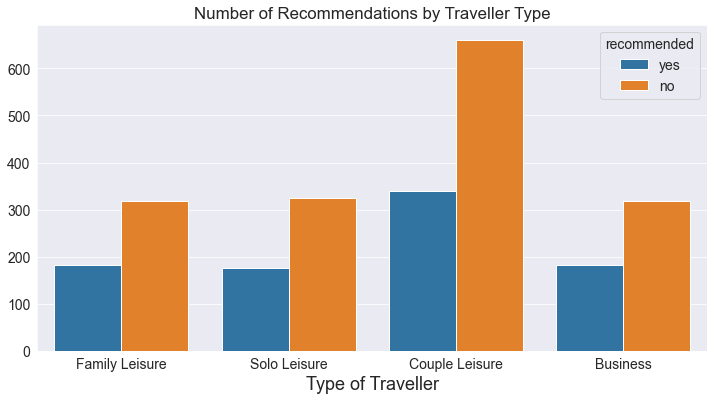

In [19]:
sns.countplot(x=data['type_of_traveller'], hue=data['recommended'])
plt.ylabel("")
plt.xlabel("Type of Traveller", fontsize=18)
plt.title("Number of Recommendations by Traveller Type")

**Majority of the travellers, especially the 'Couple Leisure' are likely not to recommend our services**

**SEAT TYPE**

In [20]:
seattype = data.seat_type.value_counts()
seattype

Economy Class      1363
Business Class      754
Premium Economy     248
First Class         135
Name: seat_type, dtype: int64

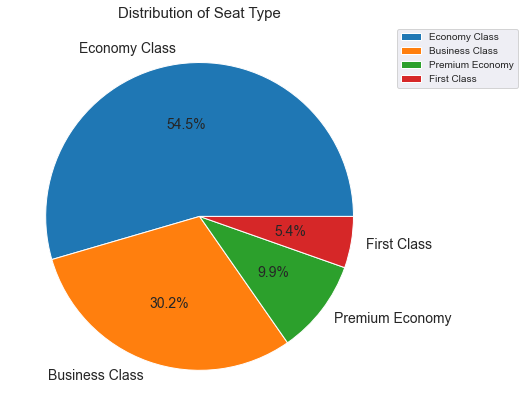

In [21]:
# Distribution plot for Seat Type
plt.title('Distribution of Seat Type',fontsize=15)
plt.pie(seattype,labels=seattype.index, autopct="%1.1f%%", startangle=360)
plt.legend(loc=2,fontsize=10,bbox_to_anchor=(1,1),ncol=1)
plt.tight_layout()

plt.show()

*As seen from the piechart:
Seat type Economy Class has the highest reviews, followed by Business Class with First Class being the least.*

Text(0.5, 1.0, 'Number of Recommendations by Seat Type')

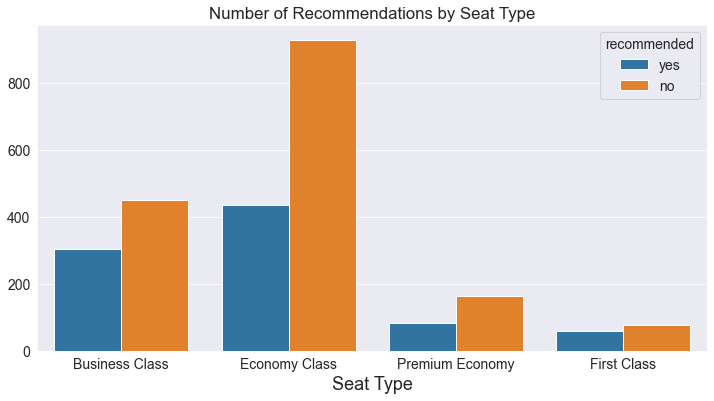

In [22]:
sns.countplot(x=data['seat_type'], hue=data['recommended'])
plt.ylabel("")
plt.xlabel("Seat Type", fontsize=18)
plt.title("Number of Recommendations by Seat Type")

**SEAT TYPE, TYPE OF TRAVELLER AND RECOMMENDED RELATIONSHIP**

<AxesSubplot:xlabel='seat_type', ylabel='count'>

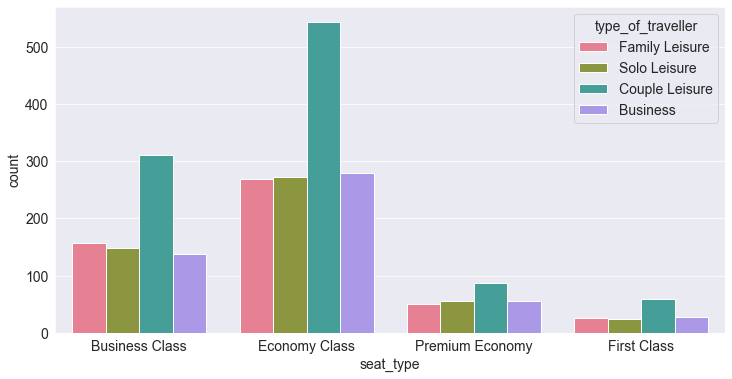

In [23]:
sns.countplot(data=data, x='seat_type', hue='type_of_traveller',palette='husl')

*A 'Couple Leisure' traveller flying the 'Economy Class' seat type is more likely not to recommend British Airway, hence, more emphasis should be laid on improving the quality of services rendered to these people as they accounted for a larger percentage of the reviewers.*

In [24]:
data.country.nunique()

67

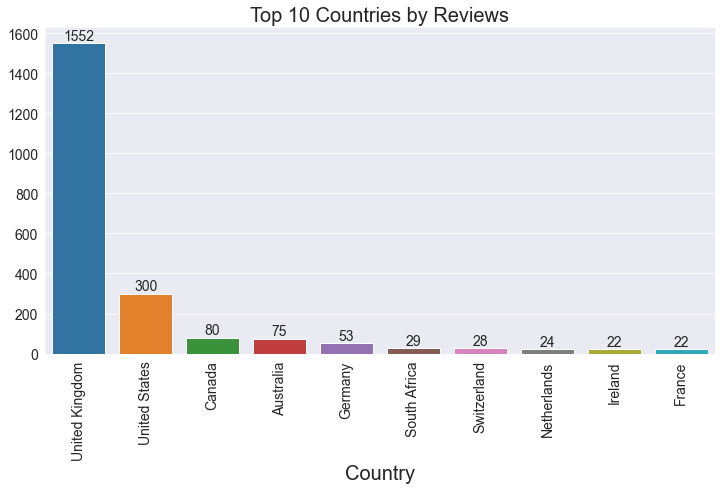

In [25]:
ax = sns.countplot(data=data, x='country',order=data['country'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('Country', fontsize=20)
plt.title('Top 10 Countries by Reviews', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,)

In [26]:
data.route.nunique()

10

In [27]:
data['route'].value_counts()

Heathrow to Las Vegas    250
Rome to Heathrow         250
Gatwick to Venice        250
London to Luanda         250
Denver to Heathrow       250
BKK to LHR               250
London to Tampa          250
London to Sydney         250
LHR to CPT               250
BLR to LHR               250
Name: route, dtype: int64

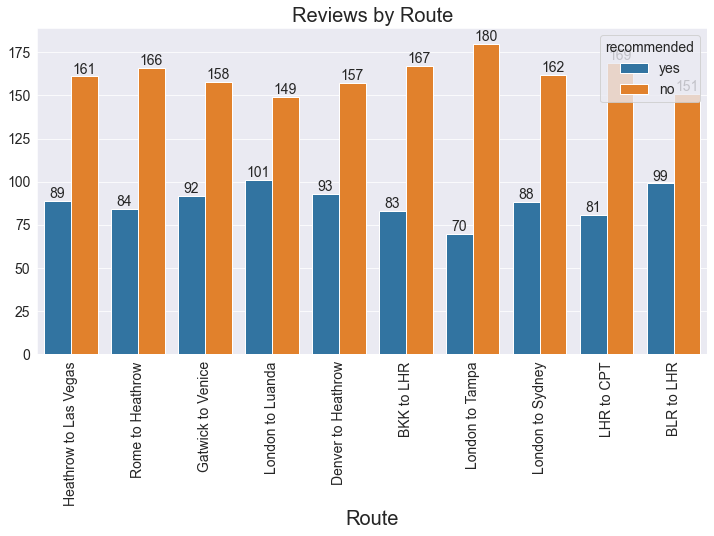

In [28]:
ax = sns.countplot(data=data, x='route',hue='recommended',order=data['route'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('Route', fontsize=20)
plt.title('Reviews by Route', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,)

*A large chunk of customers are likely not to recommend our airway. More emphasis should be put on improving services on 'London to Tampa','LHR to CPT','BKK to LHR', and 'Rome to Heathrow' routes*

(array([552, 564, 576, 588, 600, 612, 624, 636]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

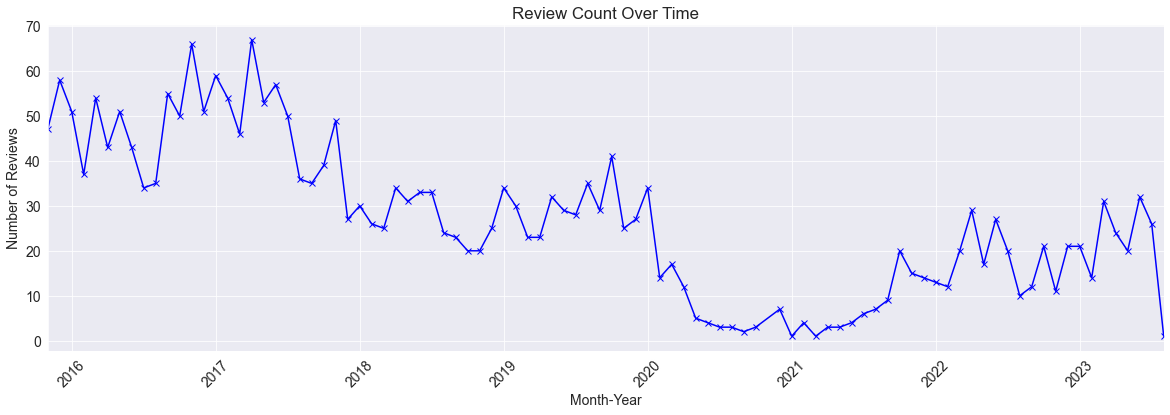

In [29]:
data['month_year'] = data['date'].dt.to_period('M')
plt.figure(figsize=(20,6))
data['month_year'].value_counts().sort_index().plot(kind='line', marker='x', color='blue')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.title('Review Count Over Time')
plt.xticks(rotation=45)

*There was  a massive drop in the number of reviews especially in 2020. This may be due to the COVID-19 epidemic.*

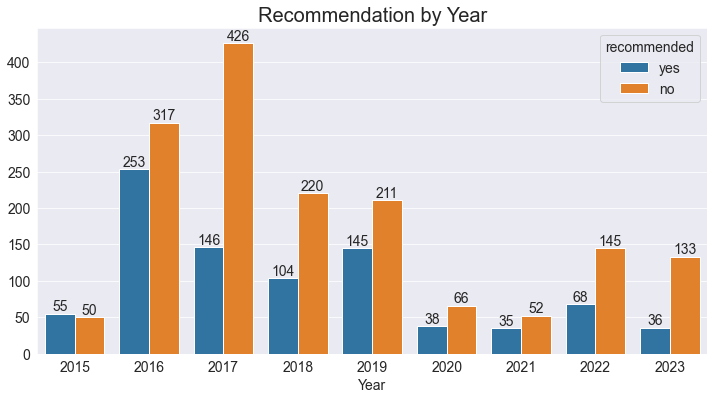

In [36]:
ax = sns.countplot(data=data, x='Year', hue='recommended')
plt.title('Recommendation by Year', fontsize=20)
plt.ylabel('')
for i in ax.containers:
    ax.bar_label(i,)

# WORD CLOUD

In [30]:
data.reviews = data.reviews.str.replace('✅ Trip Verified','',regex=True)
data.reviews = data.reviews.str.replace('|','')

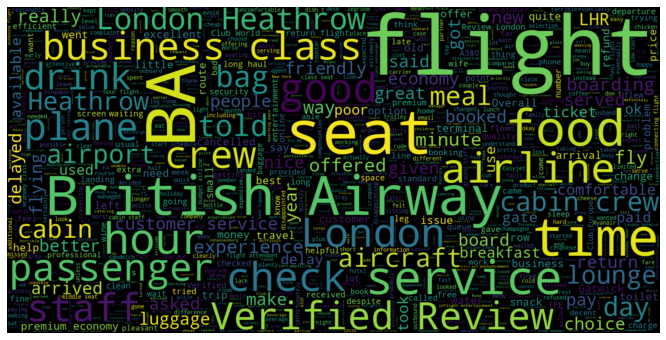

In [31]:
mystopwords = set(STOPWORDS)
my_stopwords = mystopwords.union(ENGLISH_STOP_WORDS)
wordcloud = WordCloud(stopwords=my_stopwords,max_words=1000,width=1600,height=800,max_font_size=200).generate(' '.join(data.reviews))
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')

# CONCLUSION

*The **average star ratings and percentage negative recommendation is **2.6 and 64.8%** respectively. Taking these as our metrics,there is need for retrospective insight to improve our services and meet the needs of the customers. To do this, we must look at the following:
1. In 2017, the airline witnessed an all time high reviews with over 74% not recommending our services compared to 2016 and 2015. Hence, the airline must look at what went wrong in 2017 and improve on it. This negative review has also been increasing from 2022 till present. Hence, the need for quick action to savage the situation
2. More emphasis should be put on improving services on 'London to Tampa','LHR to CPT','BKK to LHR', and 'Rome to Heathrow' routes as they experienced the highest negative recommendation
3. UK and US gave the airline the highest reviews. Satisfying these people will greatly improve our star ratings and positive recommendation
4. 54.5% of the travellers are flying economy class. Furthermore, 40% of the reviewers are 'Couple Leisure' travellers. Considering these numbers, more attention should be given to these group of travellers for better ratings and positive recommendation.*